### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
##Calcular los ingresos de cada tienda.
ingreso_Total1=tienda['Precio'].sum()
ingreso_Total2=tienda2['Precio'].sum()
ingreso_Total3=tienda3['Precio'].sum()
ingreso_Total4=tienda4['Precio'].sum()
##Mostrar los resultados
print(f'Ingresos totales de la 1era tienda: {ingreso_Total1} ')
print(f'Ingresos totales de la 2da tienda: {ingreso_Total2} ')
print(f'Ingresos totales de la 3ra tienda: {ingreso_Total3} ')
print(f'Ingresos totales de la 4ta tienda: {ingreso_Total4} ')

Ingresos totales de la 1era tienda: 1150880400.0 
Ingresos totales de la 2da tienda: 1116343500.0 
Ingresos totales de la 3ra tienda: 1098019600.0 
Ingresos totales de la 4ta tienda: 1038375700.0 


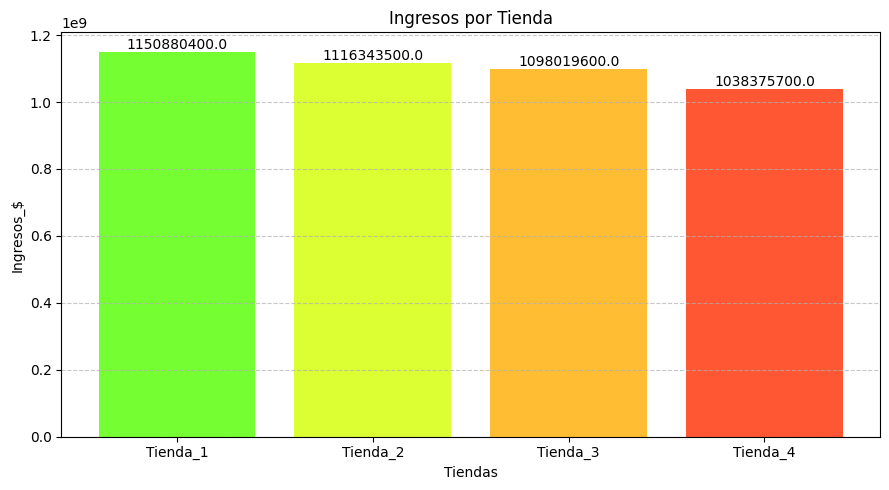

In [8]:
#Importar libreria
import matplotlib.pyplot as plt
#Números decimales con 2 cifras
pd.options.display.float_format = '{:.2f}'.format

#Definir los datos que van en la tabla
tiendas= ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']
ingresos_tiendas = [ingreso_Total1,ingreso_Total2,ingreso_Total3,ingreso_Total4]
colores = ['#75ff33','#dbff33','#ffbd33','#ff5733']
#crear el gráfico en este caso de barras
plt.figure (figsize=(9,5))
barras = plt.bar(tiendas, ingresos_tiendas, color=colores)
#Etiquetas
plt.ylabel('Ingresos_$')
plt.title('Ingresos por Tienda')
plt.xlabel('Tiendas')

plt.grid(axis='y', linestyle='--', alpha=0.7)

#Valores
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

#Mostrar gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [9]:
ventas_por_categoria = {}
#Iterar sobre los DataFrames de las tiendas
for nombre, df in {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}.items():
   #contar las ventas por categoría en cada tienda
    conteo = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre]=conteo



In [10]:
# Colores personalizados
colores = ['#75ff33', '#dbff33', '#ffbd33', '#ff5733']

# Contar productos vendidos por categoría en cada tienda
ventas_tienda1 = tienda['Categoría del Producto'].value_counts()
ventas_tienda2 = tienda2['Categoría del Producto'].value_counts()
ventas_tienda3 = tienda3['Categoría del Producto'].value_counts()
ventas_tienda4 = tienda4['Categoría del Producto'].value_counts()

# Unir los conteos en un solo DataFrame
ventas_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0).astype(int)  # Rellenar NaN con 0 y convertir a int

# Mostrar tabla
display(ventas_categoria)

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


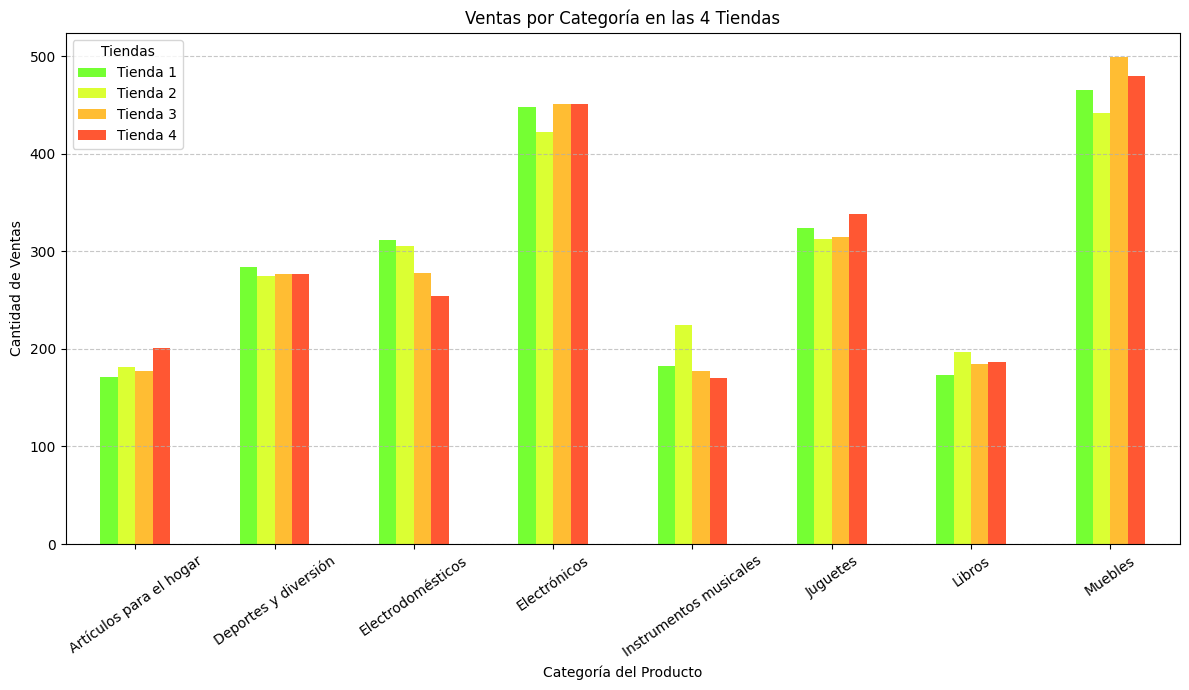

In [11]:
# Graficar barras agrupadas con colores personalizados
ax = ventas_categoria.plot(kind='bar', figsize=(12,7), color=colores)

# Títulos y etiquetas
plt.title('Ventas por Categoría en las 4 Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')

# Centrar las etiquetas en el eje X
plt.xticks(rotation=35, ha='center')  # Alinea horizontalmente las etiquetas en el centro

# Configuración de la leyenda
plt.legend(title='Tiendas')

# Configurar la rejilla
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustes finales
plt.tight_layout()
plt.show()




# 3. Calificación promedio de la tienda



In [12]:
#Calcular la calificación promedio de cada tienda
Calificación_promedio=tienda['Calificación'].mean()
Calificación_promedio2=tienda2['Calificación'].mean()
Calificación_promedio3=tienda3['Calificación'].mean()
Calificación_promedio4=tienda4['Calificación'].mean()

#Imprimir los Resultados
print(f'Calificación promedio de la 1era tienda: {Calificación_promedio:.2f}')
print(f'Calificación promedio de la 2da tienda: {Calificación_promedio2:.2f}')
print(f'Calificación promedio de la 3ra tienda: {Calificación_promedio3:.2f}')
print(f'Calificación promedio de la 4ta tienda: {Calificación_promedio4:.2f}')


Calificación promedio de la 1era tienda: 3.98
Calificación promedio de la 2da tienda: 4.04
Calificación promedio de la 3ra tienda: 4.05
Calificación promedio de la 4ta tienda: 4.00


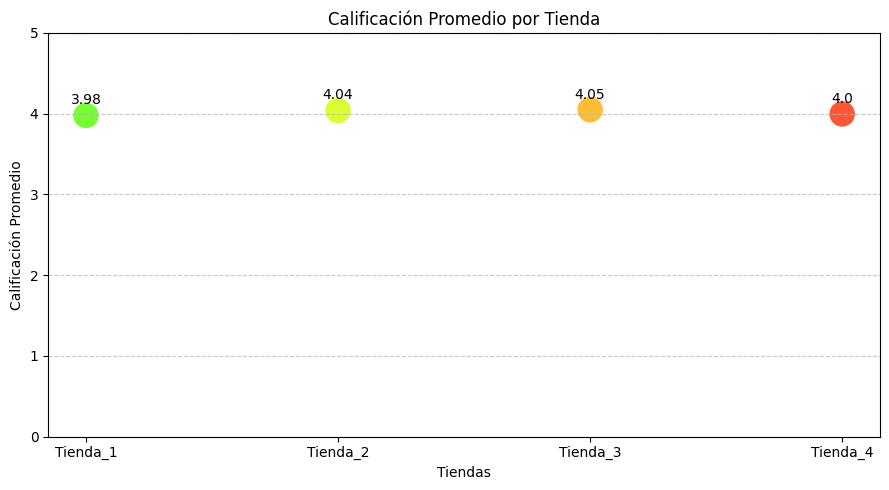

In [13]:
# Crear lista
calificacion = [Calificación_promedio, Calificación_promedio2, Calificación_promedio3, Calificación_promedio4]

plt.figure(figsize=(9,5))
plt.scatter(tiendas, calificacion, color=colores, s=300)  # 's' es el tamaño de los puntos

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el valor al lado de cada punto
for i, calificacion_valor in enumerate(calificacion):
    plt.text(i, calificacion_valor + 0.1, round(calificacion_valor,2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


Top 5 productos más vendidos en Tienda 1:
           Producto  Cantidad Vendida
0        Microondas                60
1     TV LED UHD 4K                60
2           Armario                60
3  Secadora de ropa                58
4     Mesa de noche                56


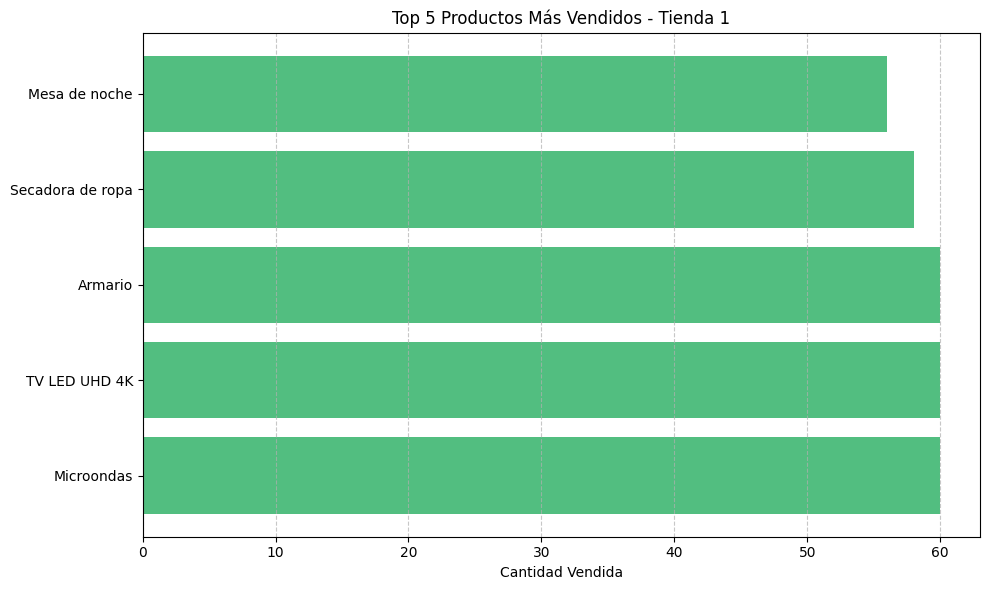

In [14]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 1': url}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Contar cantidad de veces que aparece cada producto
    top_5 = (
        df['Producto'].value_counts()
        .head(5)
        .reset_index()
    )
    top_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar tabla
    print(f"\nTop 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_5['Producto'], top_5['Cantidad Vendida'], color='#52be80')
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Top 5 productos más vendidos en Tienda 2:
                    Producto  Cantidad Vendida
0  Iniciando en programación                65
1                 Microondas                62
2                    Batería                61
3          Guitarra acústica                58
4                  Pandereta                58


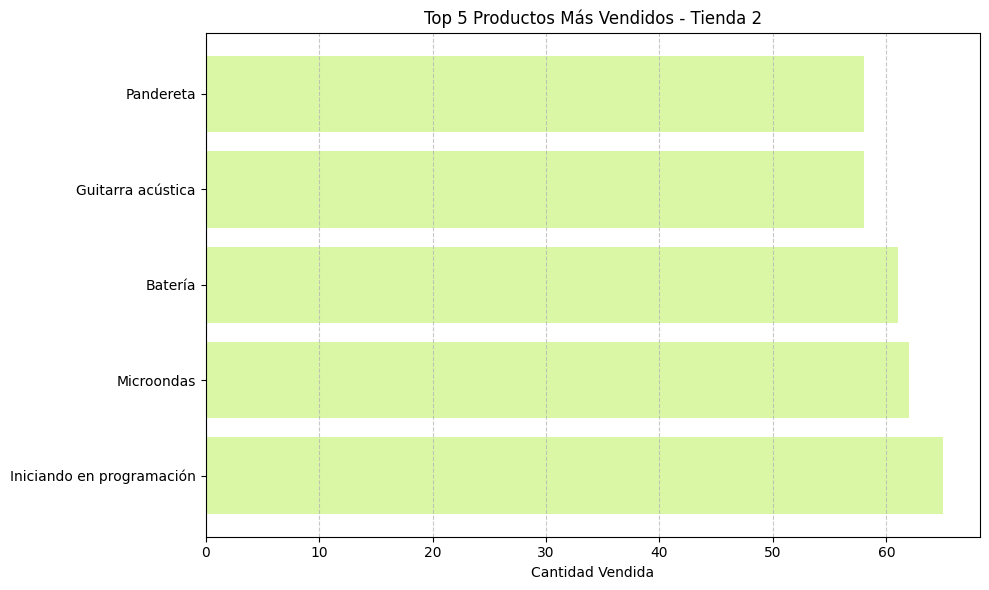

In [15]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 2': url2}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Contar cantidad de veces que aparece cada producto
    top_5 = (
        df['Producto'].value_counts()
        .head(5)
        .reset_index()
    )
    top_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar tabla
    print(f"\n Top 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)
# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_5['Producto'], top_5['Cantidad Vendida'], color='#DAF7A6')
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Top 5 productos más vendidos en Tienda 3:
          Producto  Cantidad Vendida
0    Kit de bancas                57
1  Mesa de comedor                56
2        Cama king                56
3     Set de ollas                55
4    Mesa de noche                55


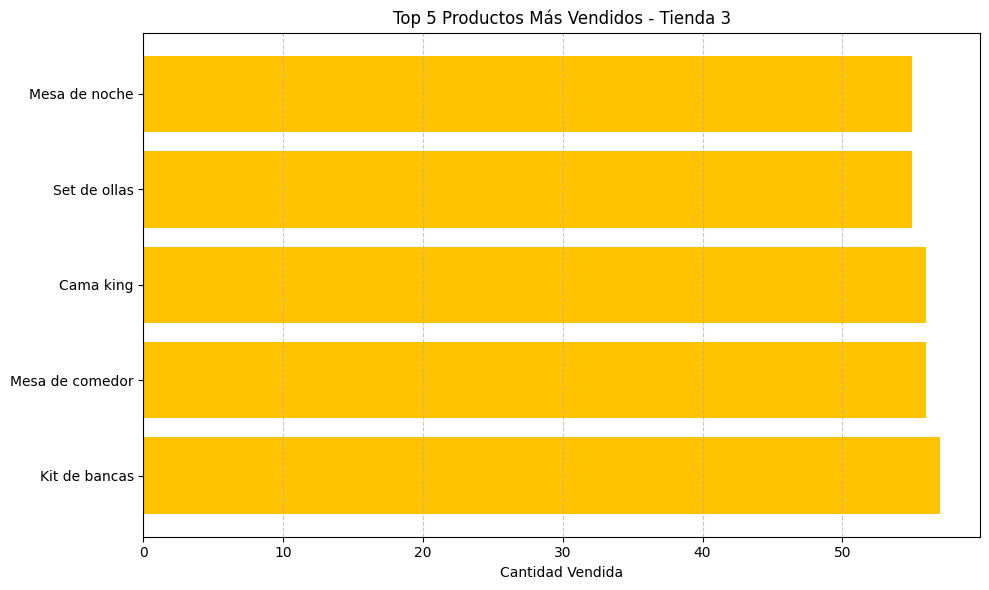

In [16]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 3': url3}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Contar cantidad de veces que aparece cada producto
    top_5 = (
        df['Producto'].value_counts()
        .head(5)
        .reset_index()
    )
    top_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar tabla
    print(f"\n Top 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)
# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_5['Producto'], top_5['Cantidad Vendida'], color='#FFC300')
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 5 productos más vendidos en Tienda 4:
                    Producto  Cantidad Vendida
0                   Cama box                62
1                 Cubertería                59
2    Dashboards con Power BI                56
3                  Cama king                56
4  Carrito de control remoto                55


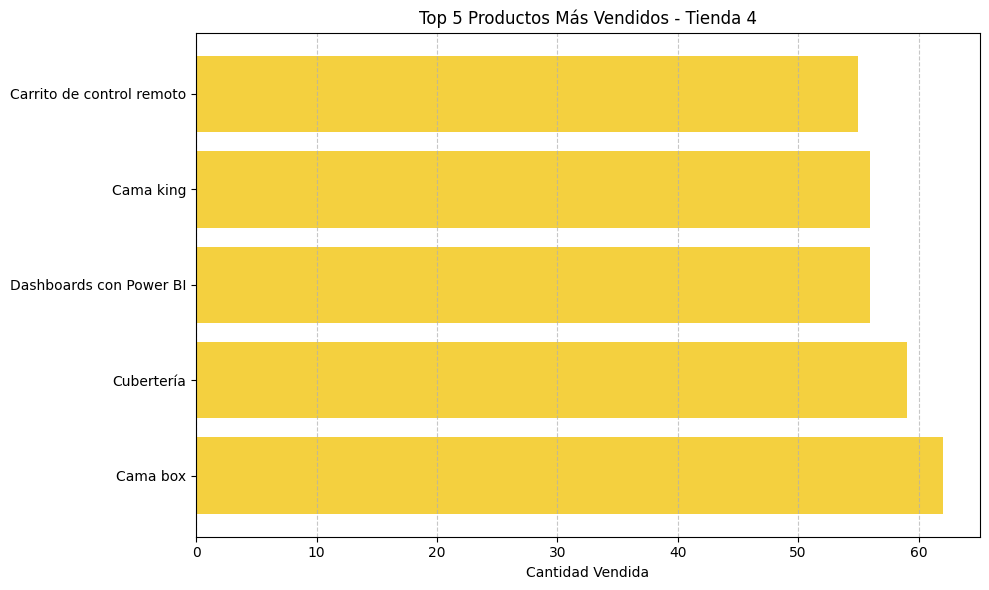

In [17]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 4': url4}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Contar cantidad de veces que aparece cada producto
    top_5 = (
        df['Producto'].value_counts()
        .head(5)
        .reset_index()
    )
    top_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar tabla
    print(f"\nTop 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)
# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_5['Producto'], top_5['Cantidad Vendida'], color='#f4d03f')
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Menos vendidos




Top 5 productos menos vendidos en Tienda 1:
                      Producto  Cantidad Vendida
0                 Refrigerador                38
1  Ciencia de datos con Python                38
2            Guitarra acústica                37
3                      Armario                34
4           Guitarra eléctrica                33


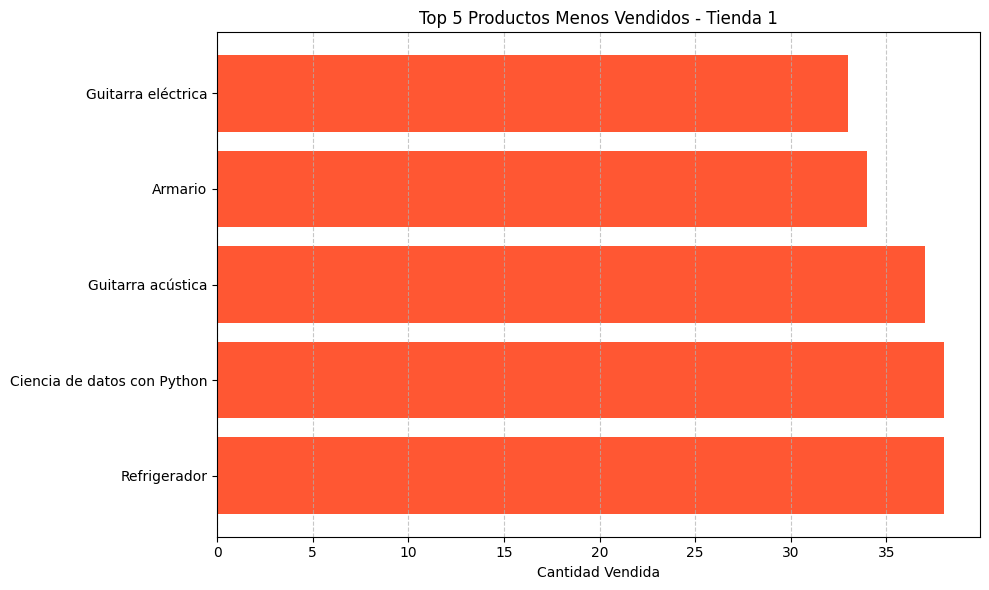

In [18]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 1': url}

# Colores que usaste antes
colores = ['#ff5733']

# Recorrer cada tienda
for i, (nombre_tienda, url) in enumerate(urls_tiendas.items()):
    # Leer los datos
    df = pd.read_csv(url)

    # Obtener el bottom 5 de productos menos vendidos
    bottom_5 = (
        df['Producto'].value_counts()
        .tail(5)
        .reset_index()
    )
    bottom_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar en tabla
    print(f"\nTop 5 productos menos vendidos en {nombre_tienda}:")
    print(bottom_5)

# Graficar en barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Producto'], bottom_5['Cantidad Vendida'], color=colores[i])
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Menos Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top 5 productos menos vendidos en Tienda 2:
          Producto  Cantidad Vendida
0      Auriculares                37
1           Sillón                35
2  Mesa de comedor                34
3        Impresora                34
4    Juego de mesa                32


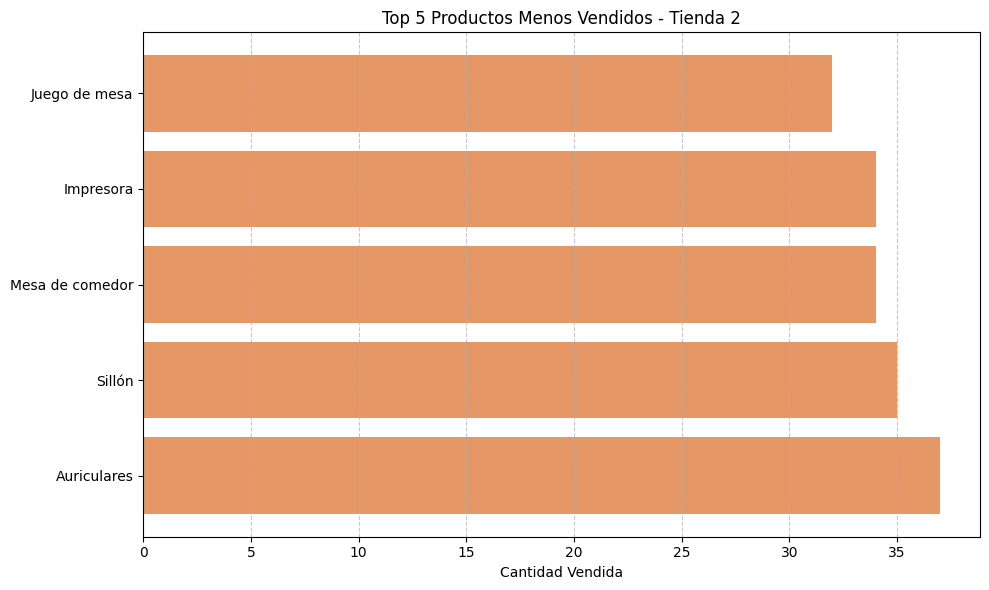

In [19]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 2': url2}

# Colores que usaste antes
colores = ['#e59866']

# Recorrer cada tienda
for i, (nombre_tienda, url) in enumerate(urls_tiendas.items()):
    # Leer los datos
    df = pd.read_csv(url)

    # Obtener el bottom 5 de productos menos vendidos
    bottom_5 = (
        df['Producto'].value_counts()
        .tail(5)
        .reset_index()
    )
    bottom_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar en tabla
    print(f"\nTop 5 productos menos vendidos en {nombre_tienda}:")
    print(bottom_5)

# Graficar en barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Producto'], bottom_5['Cantidad Vendida'], color=colores[i])
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Menos Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top 5 productos menos vendidos en Tienda 3:
                  Producto  Cantidad Vendida
0       Guitarra eléctrica                38
1             Set de vasos                36
2                  Mochila                36
3               Microondas                36
4  Bloques de construcción                35


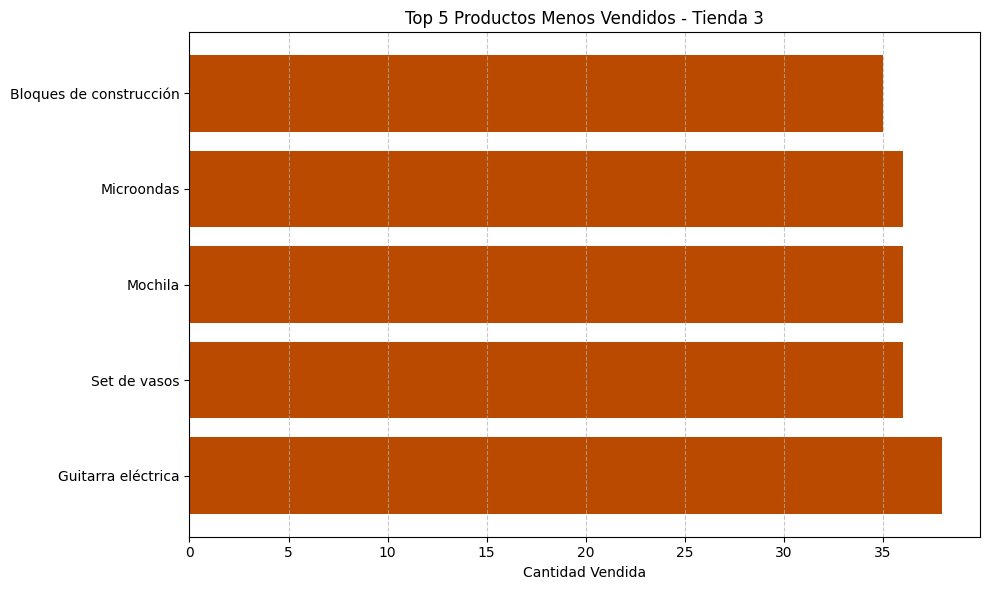

In [21]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 3': url3}

# Colores que usaste antes
colores = ['#ba4a00']

# Recorrer cada tienda
for i, (nombre_tienda, url) in enumerate(urls_tiendas.items()):
    # Leer los datos
    df = pd.read_csv(url)

    # Obtener el bottom 5 de productos menos vendidos
    bottom_5 = (
        df['Producto'].value_counts()
        .tail(5)
        .reset_index()
    )
    bottom_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar en tabla
    print(f"\nTop 5 productos menos vendidos en {nombre_tienda}:")
    print(bottom_5)

# Graficar en barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Producto'], bottom_5['Cantidad Vendida'], color=colores[i])
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Menos Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top 5 productos menos vendidos en Tienda 4:
                      Producto  Cantidad Vendida
0                 Refrigerador                38
1  Ciencia de datos con Python                38
2            Guitarra acústica                37
3                      Armario                34
4           Guitarra eléctrica                33


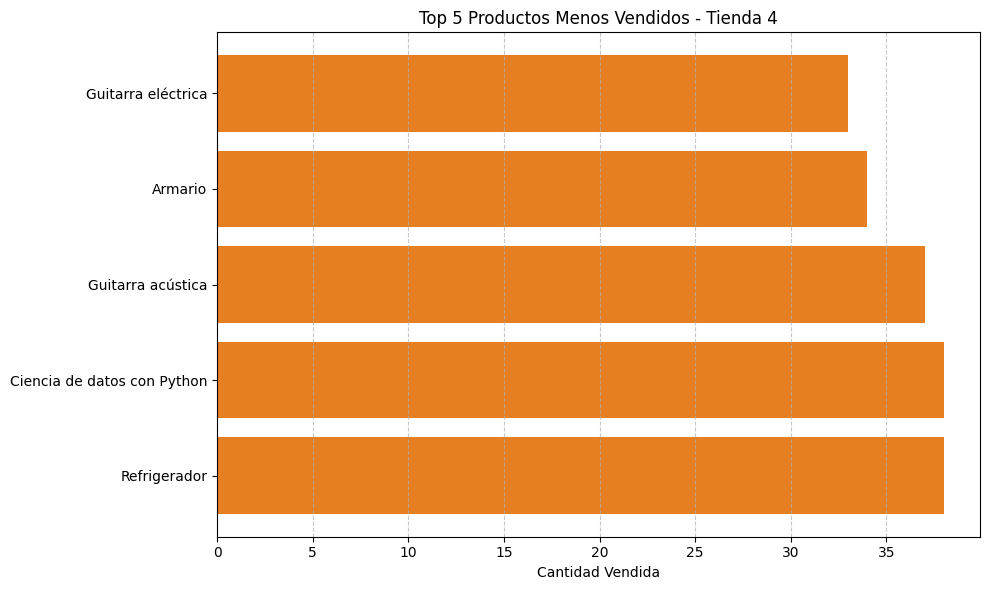

In [22]:
# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {'Tienda 4': url4}

# Colores que usaste antes
colores = ['#e67e22']

# Recorrer cada tienda
for i, (nombre_tienda, url) in enumerate(urls_tiendas.items()):
    # Leer los datos
    df = pd.read_csv(url)

    # Obtener el bottom 5 de productos menos vendidos
    bottom_5 = (
        df['Producto'].value_counts()
        .tail(5)
        .reset_index()
    )
    bottom_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar en tabla
    print(f"\nTop 5 productos menos vendidos en {nombre_tienda}:")
    print(bottom_5)

# Graficar en barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Producto'], bottom_5['Cantidad Vendida'], color=colores[i])
plt.xlabel('Cantidad Vendida')
plt.title(f'Top 5 Productos Menos Vendidos - {nombre_tienda}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [23]:
envio_promedio1 = tienda['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

# Mostrar resultados
print(f"Envío promedio - Tienda 1: ${envio_promedio1:.2f}")
print(f"Envío promedio - Tienda 2: ${envio_promedio2:.2f}")
print(f"Envío promedio - Tienda 3: ${envio_promedio3:.2f}")
print(f"Envío promedio - Tienda 4: ${envio_promedio4:.2f}")




Envío promedio - Tienda 1: $26018.61
Envío promedio - Tienda 2: $25216.24
Envío promedio - Tienda 3: $24805.68
Envío promedio - Tienda 4: $23459.46


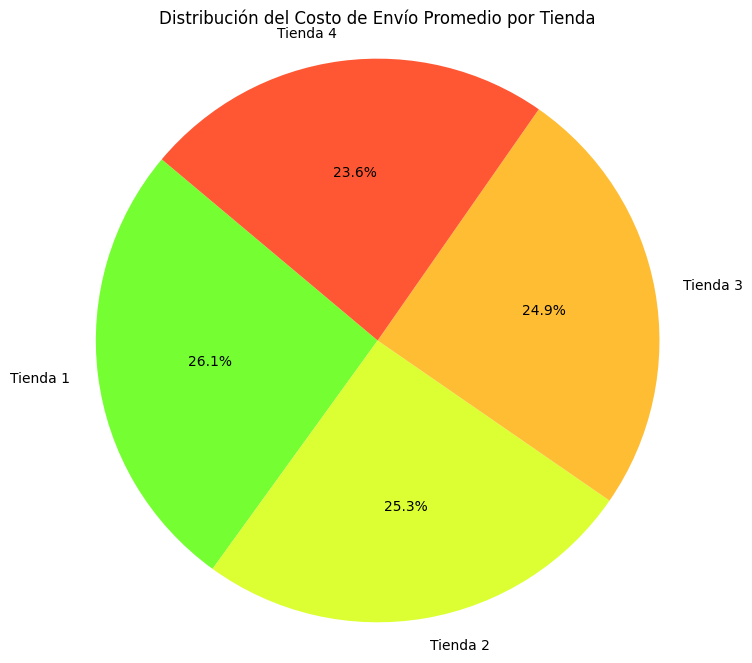

In [26]:
# Datos
envios = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#75ff33', '#dbff33', '#ffbd33', '#ff5733']

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(envios, labels=tiendas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Costo de Envío Promedio por Tienda')
plt.axis('equal')  # Para que el círculo quede bien redondo
plt.show()


## Informe Final
Recomendación para el Sr. Juan sobre qué tienda vender

***Introducción***

Con el objetivo de apoyar al Sr. Juan en su decisión de vender una de las tiendas de su cadena Alura Store para iniciar un nuevo emprendimiento, se ha realizado un análisis exhaustivo de las 4 tiendas disponibles. Este estudio incluye aspectos clave como ingresos totales, categorías de productos más vendidas, calificaciones promedio de clientes, productos más y menos vendidos y el costo de envío promedio. A partir de este análisis, se pretende identificar la tienda menos eficiente, fundamentando la recomendación con datos y visualizaciones generadas a lo largo del trabajo.





# *Desarrollo*
**Ingresos Totales**

La tienda 1 presenta los mayores ingresos acumulados durante el periodo analizado, seguida por las tiendas 2 y 3. La tienda 4 se destaca negativamente, con una diferencia de más de $112.500.000 con respecto a la tienda 1. Esta tendencia decreciente podría estar relacionada con factores como la antigüedad del negocio, ubicación geográfica o nivel de consolidación.

**Ventas por Categoría / Productos más y menos Vendidos**

Todas las tiendas comercializan las mismas categorías de productos. "Muebles" y "Electrónicos" destacan como las más vendidas en la mayoría de las tiendas. La tienda 4, aunque con menor facturación general, presenta un mejor comportamiento relativo en la categoría de "Juguetes". En cuanto a los productos específicos, los más vendidos tienden a ser muebles y dispositivos electrónicos, especialmente en las tiendas 1 y 3. Por el contrario, los productos menos vendidos están relacionados con libros e instrumentos musicales.

**Calificaciones Promedio**

Las calificaciones promedio de las tiendas son similares, todas rondando un valor de 4 sobre 5. Sin embargo, la tienda 1, pese a ser la más exitosa en ventas, presenta la calificación más baja. Esto podría estar relacionado con el volumen de ventas y la dificultad de mantener altos estándares de servicio. La tienda 4 mantiene una calificación promedio similar a las demás, aunque con menor volumen de operaciones.

**Coste de Envío Promedio**

Existe una correlación directa entre la cantidad de ventas y el costo de envío promedio. La tienda 1, con mayores ventas, también refleja el costo de envío promedio más alto. En contraste, la tienda 4 posee el costo de envío promedio más bajo, consistente con su menor actividad comercial.

# ***Conclusión***

Tras el análisis de todos los indicadores clave, se recomienda que el Sr. Juan venda la tienda 4. Esta tienda muestra un rendimiento inferior de forma consistente en los distintos indicadores:


1. Es la que menos ingresos genera.
2. Tiene menor participación en ventas por categoría.
3. Su volumen de ventas y envíos es el más bajo.
4. A pesar de mantener una calificación promedio similar a las demás tiendas, no destaca en ningún aspecto clave.

Vender la tienda 4 permitirá al Sr. Juan enfocar sus recursos y energía en las tiendas con mejor rendimiento, y eventualmente reinvertir en estrategias que potencien la satisfacción del cliente y la eficiencia operativa. La información obtenida a través de este análisis ofrece una base sólida para tomar una decisión empresarial con respaldo cuantitativo.